In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sql_function import create_connection
from sql_query import rented_film_and_profit

In [2]:
pd.plotting.register_matplotlib_converters()
plt.style.use("seaborn-whitegrid")
pd.set_option("display.max_columns", 500)
warnings.filterwarnings("ignore")

### Create SQL Connection

In [3]:
SQL_PATH = 'sqlite-sakila.db'
connection = create_connection(SQL_PATH)

Connection to SQLite is successful


### Check Query and Simple Data Validation

In [4]:
df = pd.read_sql_query(rented_film_and_profit, connection)
df.head()

,title,n_film,profit_by_film
0,ACADEMY DINOSAUR,23,36.77
1,ACE GOLDFINGER,7,52.93
2,ADAPTATION HOLES,12,37.88
3,AFFAIR PREJUDICE,23,91.77
4,AFRICAN EGG,12,51.88


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           958 non-null    object 
 1   n_film          958 non-null    int64  
 2   profit_by_film  958 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 22.6+ KB


In [6]:
df.isnull().sum()

title             0
n_film            0
profit_by_film    0
dtype: int64

In [7]:
df[df.duplicated()]

,title,n_film,profit_by_film


### Data Analysis

In [8]:
df.sort_values("n_film", ascending=False)[:10]

,title,n_film,profit_by_film
96,BUCKET BROTHERHOOD,34,180.66
705,ROCKETEER MOTHER,33,116.67
697,RIDGEMONT SUBMARINE,32,130.68
361,GRIT CLOCKWORK,32,110.68
465,JUGGLER HARDLY,32,96.68
312,FORWARD TEMPLE,32,128.68
733,SCALAWAG DUCK,32,172.68
957,ZORRO ARK,31,214.69
853,TIMBERLAND SKY,31,123.69
29,APACHE DIVINE,31,178.69


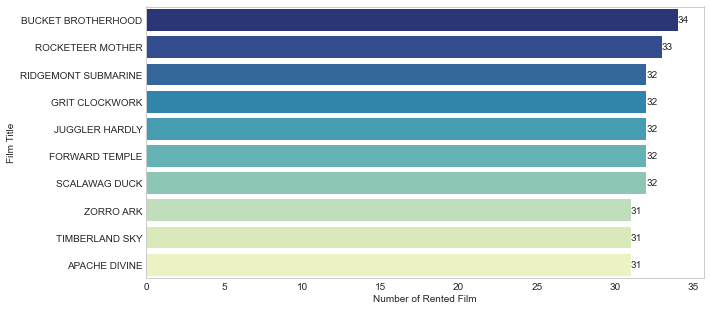

In [9]:
most_rented_film = df.sort_values("n_film", ascending=False)[:10]

plt.figure(figsize=(10, 5))

ax = sns.barplot(x="n_film", 
            y="title",
            palette="YlGnBu_r",
            data=most_rented_film)

ax.bar_label(ax.containers[0])
ax.grid(False)

plt.xlabel("Number of Rented Film")
plt.ylabel("Film Title")

plt.show()

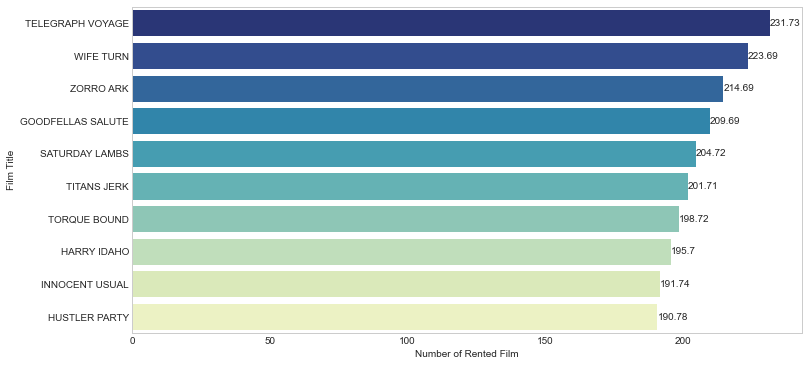

In [10]:
profit_each_film = df.sort_values("profit_by_film", ascending=False)[:10]

plt.figure(figsize=(12, 6))

ax = sns.barplot(x="profit_by_film", 
            y="title",
            palette="YlGnBu_r",
            data=profit_each_film)

ax.bar_label(ax.containers[0])
ax.grid(False)

plt.xlabel("Number of Rented Film")
plt.ylabel("Film Title")

plt.show()

In [13]:
film_table_query = """
    SELECT 
        title,
        rental_rate,
        replacement_cost 
    FROM film
""" 

pd.read_sql_query(film_table_query, connection).head()

,title,rental_rate,replacement_cost
0,ACADEMY DINOSAUR,0.99,20.99
1,ACE GOLDFINGER,4.99,12.99
2,ADAPTATION HOLES,2.99,18.99
3,AFFAIR PREJUDICE,2.99,26.99
4,AFRICAN EGG,2.99,22.99
